<a href="https://colab.research.google.com/github/PurpelRa1N/BuyAndSell/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
# Loading the Data  

import numpy as np 
import pandas as pd 
import matplotlib.pypot as plt 
from datetime import datetime 
%matplotlib inline


from google.colab import files 
uploaded = files.upload()

Saving Reliance.csv to Reliance (1).csv


In [98]:
RIL = pd.read_csv("Reliance.csv")

In [100]:
RIL


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...,...
1228,2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0


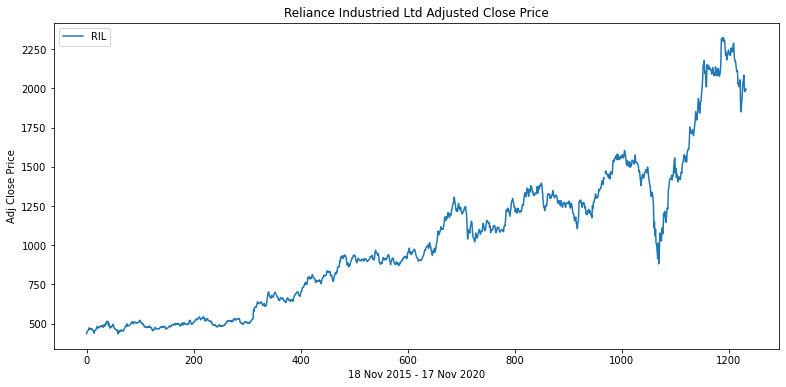

In [101]:
# Visualize the Data 

plt.figure(figsize=(13,6))
plt.plot(RIL['Adj Close'], label = 'RIL')
plt.title('Reliance Industried Ltd Adjusted Close Price')
plt.xlabel('18 Nov 2015 - 17 Nov 2020')
plt.ylabel('Adj Close Price')
plt.legend(loc = 'upper left')
plt.show()


In [102]:
# Creating the Simple Moving Average 

SMA30  = pd.DataFrame()
SMA30['Adj Close Price'] = RIL['Adj Close'].rolling(30).mean()
SMA30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1228,2121.285002
1229,2113.023332
1230,2104.544995
1231,2096.916663


In [103]:
SMA100  = pd.DataFrame()
SMA100['Adj Close Price'] = RIL['Adj Close'].rolling(100).mean()
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1228,2071.109883
1229,2073.937257
1230,2076.523392
1231,2079.372655


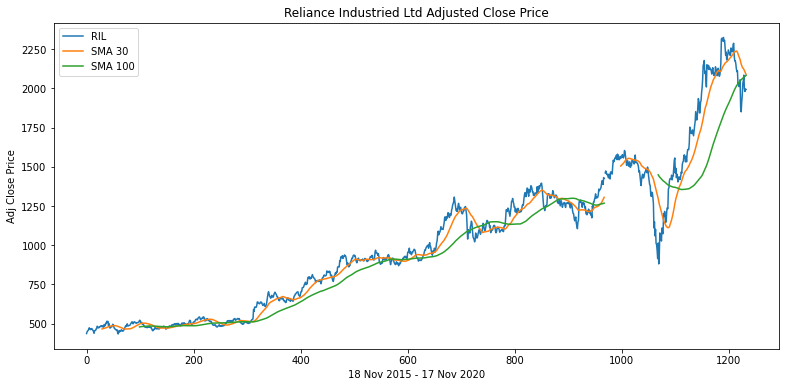

In [104]:
plt.figure(figsize=(13,6))
plt.plot(RIL['Adj Close'], label = 'RIL')
plt.plot(SMA30['Adj Close Price'], label = 'SMA 30')
plt.plot(SMA100['Adj Close Price'], label = 'SMA 100')
plt.title('Reliance Industried Ltd Adjusted Close Price')
plt.xlabel('18 Nov 2015 - 17 Nov 2020')
plt.ylabel('Adj Close Price')
plt.legend(loc = 'upper left')
plt.show()



In [105]:
# Creating a new dataframe to store all this data 

data = pd.DataFrame()
data['RIL'] = RIL['Adj Close']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] = SMA100['Adj Close Price']
data

,RIL,SMA30,SMA100
0,436.671021,NaN,NaN
1,447.563873,NaN,NaN
2,453.357422,NaN,NaN
3,456.661224,NaN,NaN
4,463.340515,NaN,NaN
...,...,...,...
1228,2084.550049,2121.285002,2071.109883
1229,1997.199951,2113.023332,2073.937257
1230,1980.000000,2104.544995,2076.523392
1231,1996.400024,2096.916663,2079.372655


In [106]:
# Creating a function to signal when to buy and when to sell the stock

def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):

    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['RIL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    elif data['SMA30'][i] < data['SMA100'][i]:

      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['RIL'][i])
        flag = 0

      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    return (sigPriceBuy, sigPriceSell)





In [107]:
#Store the buy and sell data into a variable

buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

ValueError: ignored